# Math 466 Spring 2025: Homework 3

###  Due Th Apr 3rd, 10pm EST


Please give your NAME in the handin file.



---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time

random_state = 2025

----

**Problem 1** 

Load and process data: 0.00021195411682128906 seconds


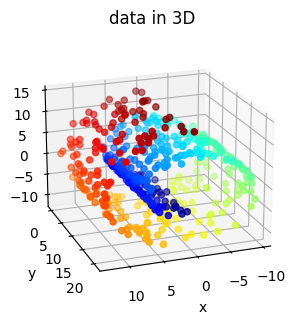

In [2]:
# code to load data

from sklearn.datasets import make_swiss_roll

start = time.time()
# load swiss roll dataset
n_samples = 500 
noise = 0.05

np.random.seed(random_state) # use random seed

X, y = make_swiss_roll(n_samples, noise=noise)
end = time.time()
print("Load and process data:", end - start, "seconds")


# plot the data colored by class labels
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c= y, cmap='jet')
ax.set_title("data in 3D")
ax.set_xlabel('x');  ax.set_ylabel('y'); ax.set_zlabel('z'); 
ax.view_init(20, 70)

---

----

**Problem 2** 

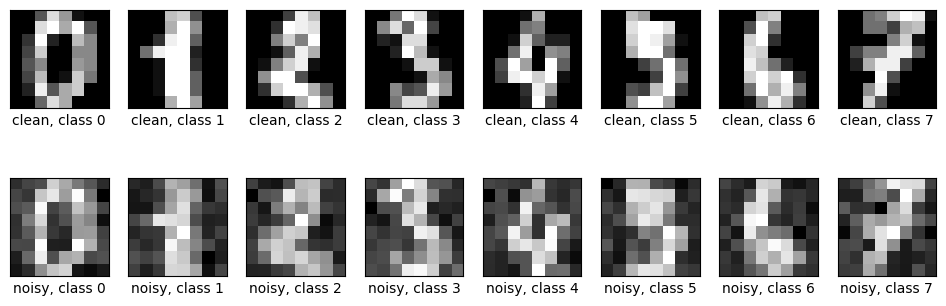

In [3]:
# load the digit data
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

# subselect the first 1000 samples
nX = 1000
data = X[0:nX,:]
labels = y[0:nX]

# add high dimensional nosie to the data
rng = np.random.seed(random_state)
noise = np.random.normal(size=(nX,64))*2
data_noise = data + noise

# visualize the clean and noisey data
plt.figure(figsize=(15, 4))
for i in range(8):
    l1_plot = plt.subplot(2, 10, i + 1)
    l1_plot.imshow(data[i,:].reshape(8, 8), cmap='gray')
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('clean, class %s' % labels[i])

for i in range(8):
    l1_plot = plt.subplot(2, 10, i + 11)
    l1_plot.imshow(data_noise[i,:].reshape(8, 8), cmap='gray')
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('noisy, class %s' % labels[i])


------

----

**Problem 3** 

In [4]:
import numpy as np

# Define torus parameters
R = 3    # Major radius
r = 1    # Minor radius
N = 10    # Number of helical turns
num_points = 500  # Number of points for helix

# Define torus mesh
theta_torus = np.linspace(0, 2 * np.pi, 50)
phi_torus = np.linspace(0, 2 * np.pi, 30)
theta_torus, phi_torus = np.meshgrid(theta_torus, phi_torus)

# Parametric equations for the torus
X_torus = (R + r * np.cos(phi_torus)) * np.cos(theta_torus)
Y_torus = (R + r * np.cos(phi_torus)) * np.sin(theta_torus)
Z_torus = r * np.sin(phi_torus)

# Define density
sigmoid = lambda u: 1/(1+np.exp(-u))
sigmoid_derivative = lambda u: sigmoid(u)*(1-sigmoid(u))
k = 5
scale, shift = sigmoid(k)-sigmoid(-k), sigmoid(-k)
f = lambda u: (sigmoid(k*u) - shift) / scale
p = lambda u: scale/k / sigmoid_derivative(k*u)
# Define theta (azimuthal angle)
u = np.linspace(-1, 1, num_points)
# u = 2*np.random.rand(num_points) - 1
# u = np.sort(u)
theta = 2*np.pi* f(u)

# Compute toroidal helix coordinates
x_helix = (R + r * np.cos(N * theta)) * np.cos(theta)
y_helix = (R + r * np.cos(N * theta)) * np.sin(theta)
z_helix = r * np.sin(N * theta)

X = np.stack( (x_helix, y_helix, z_helix), axis=1 )
y = theta


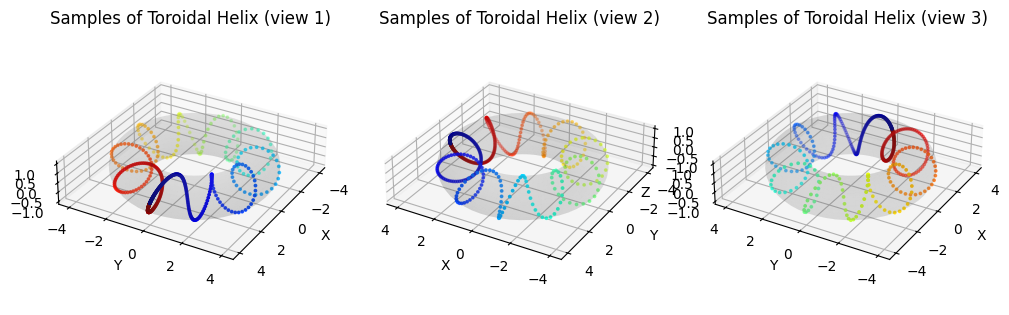

In [5]:
# Visualize the samples
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(131, projection='3d')
# Plot transparent torus
ax.plot_surface(X_torus, Y_torus, Z_torus, color='grey', alpha=0.1, edgecolor='none')
# Scatter the toroidal helix points with colormap
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='jet', s=3)
# Labels and view adjustments
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_aspect('equal')
ax.set_title("Samples of Toroidal Helix (view 1)")
ax.view_init(30, 30)

ax = fig.add_subplot(132, projection='3d')
# Plot transparent torus
ax.plot_surface(X_torus, Y_torus, Z_torus, color='grey', alpha=0.1, edgecolor='none')
# Scatter the toroidal helix points with colormap
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='jet', s=3)
# Labels and view adjustments
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_aspect('equal')
ax.set_title("Samples of Toroidal Helix (view 2)")
ax.view_init(30, 120)

ax = fig.add_subplot(133, projection='3d')
# Plot transparent torus
ax.plot_surface(X_torus, Y_torus, Z_torus, color='grey', alpha=0.1, edgecolor='none')
# Scatter the toroidal helix points with colormap
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='jet', s=3)
# Labels and view adjustments
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_aspect('equal')
ax.set_title("Samples of Toroidal Helix (view 3)")
ax.view_init(30, 210)

plt.show()

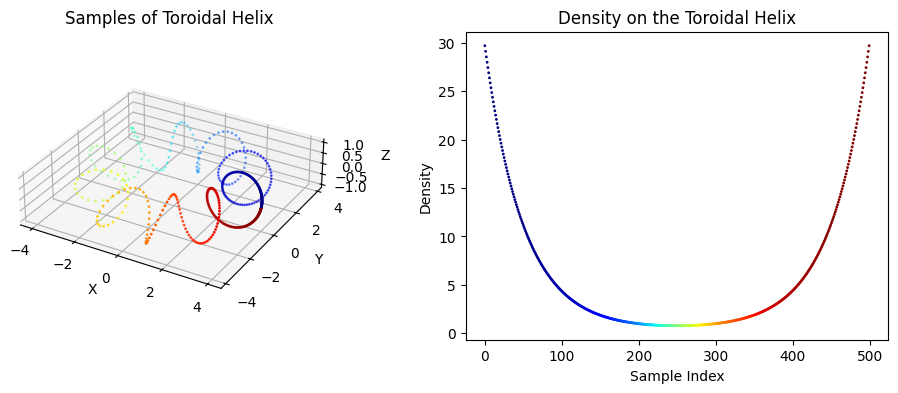

In [6]:
# Visualize the density
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121, projection='3d')
# Scatter the toroidal helix points with colormap
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='jet', s=1)
# Labels and view adjustments
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_aspect('equal')
ax.set_title("Samples of Toroidal Helix")

ax = fig.add_subplot(122)
# Plot the density at each point
ax.scatter(range(num_points),p(u), c=theta, cmap='jet', s=1)
ax.set_xlabel("Sample Index")
ax.set_ylabel("Density")
ax.set_title("Density on the Toroidal Helix")

plt.show()

------